In [1]:
import sys; sys.path.insert(0,'..')
from cadence.imports import *
from cadence.parsers.rhythm import *

In [3]:
# !pip install ipywidgets IProgress

In [4]:
# t = Verse("""
# Of Mans First Disobedience, and the Fruit
# Of that Forbidden Tree, whose mortal tast
# Brought Death into the World, and all our woe,
# With loss of Eden, till one greater Man
# Restore us, and regain the blissful Seat,
# Sing Heav'nly Muse, that on the secret top
# Of Oreb, or of Sinai, didst inspire
# That Shepherd, who first taught the chosen Seed,
# In the Beginning how the Heav'ns and Earth
# Rose out of Chaos: Or if Sion Hill
# Delight thee more, and Siloa’s Brook that flow’d
# Fast by the Oracle of God; I thence
# Invoke thy aid to my adventrous Song,
# That with no middle flight intends to soar
# Above th Aonian Mount, while it pursues
# Things unattempted yet in Prose or Rhime.
# """)

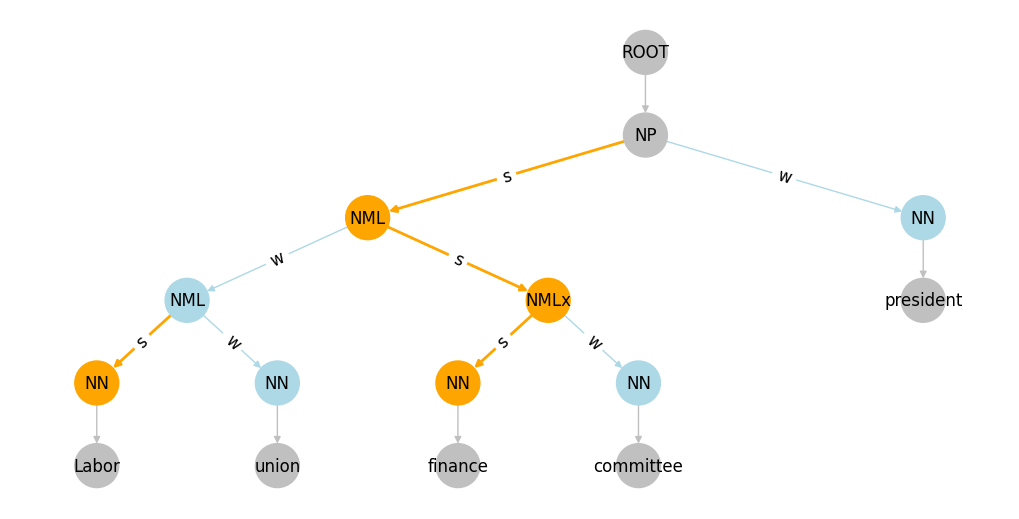

ROOT

In [5]:
btree = Text("Labor union finance committee president").sent(1).btree()
btree

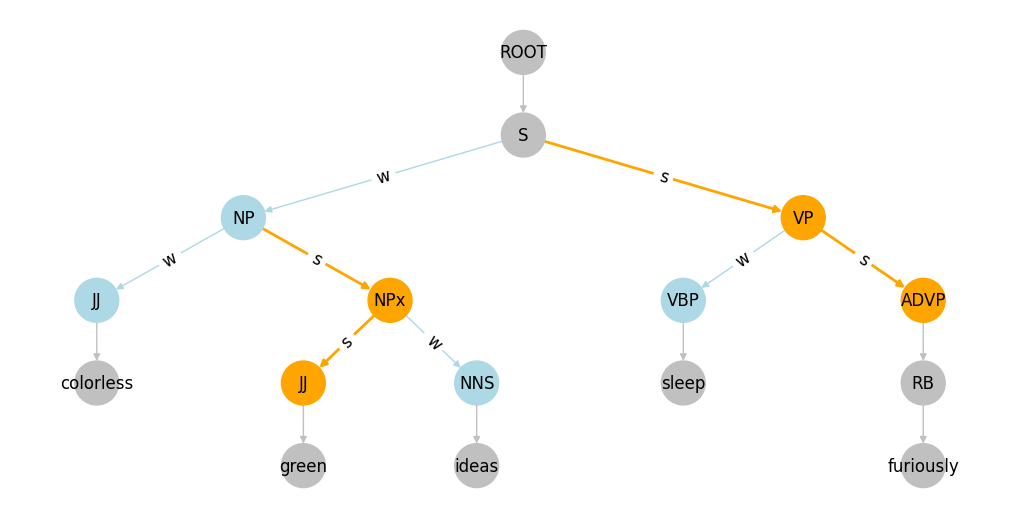

ROOT

In [7]:
Text("colorless green ideas sleep furiously").sent(1).btree()

In [11]:
def quantify_stress(self):
    proms = [x.prom for x in self.iter_ancestry()]
    num_down = len([p is False for p in proms])
    num_up = len([p is True for p in proms])
    return num_up * -1

def get_nested_proms(self, ws=True):
        return [
            obj.ws if ws else obj.prom 
            for obj in self.iter_ancestry() 
            if obj.prom is not None
        ]

def get_sum_prom(self):
    """
    (12) If a terminalnode t is labelled w, its stress number is equal to the number of nodes that dominate it, plus one. If a terminalnode t is labelled s, its stress number is equal to the number of nodes that dominate the lowest w dominating t, plus one.
    """

    if not self.is_leaf(): return np.nan
    proms = self.get_nested_proms(ws=True)
    
    prom = proms[0]
    proms_above = proms[1:]

    # if terminal node is 'w'
    if prom == 'w':
        return len(proms_above) + 1
    else:
        # find lowest w
        try:
            lowest_w_index = proms_above.index('w')
            proms_above_w = proms_above[lowest_w_index:]
            return len()    
            prom_index = proms.index(False)


        except IndexError:
            pass

        return sum(1 for x in proms if x is False) + 1
    
    elif self.prom is True: # if labeled 's'
        for parent in self.iter_ancestry():
            # find lowest w dominating t
            if parent.prom is False:
                return parent.get_sum_prom()
    
    return 1


BinaryTree.quantify_stress = quantify_stress
BinaryTree.get_nested_proms = get_nested_proms
BinaryTree.get_sum_prom = get_sum_prom

In [12]:
for n in btree.iter_leaves():
    print(n, n.get_sum_prom())

Labor ['s', 'w', 's']
union ['w', 'w', 's']
finance ['s', 's', 's']
committee ['w', 's', 's']
president ['w']


In [6]:
def draw_graph(G):
    plt.rcParams["figure.figsize"] = [10.,5.]
    #pos =graphviz_layout(G, prog='dot')
    pos = hierarchy_pos(G)
    
    node_labels=nx.get_node_attributes(G,'label')
    node_ws=[d['obj'].ws for n,d in G.nodes(data=True)]

    def to_color(lbl):
        if lbl=='w': return 'lightblue'
        if lbl=='s': return 'orange'
        return 'silver'

    stresses = [node.q]

    def to_size(node):
        if node.is_leaf():
            return node.quantify_stress()

        return 1
    
    node_colors = [to_color(x) for x in node_ws]
    edge_weights = [2 if d['prom'] else 1 for a,b,d in G.edges(data=True)]
    edge_colors = [to_color(d['label']) for a,b,d in G.edges(data=True)]

    nx.draw(
        G,
        pos, 
        with_labels=True,
        labels=node_labels, 
        width=edge_weights, 
        edge_color=edge_colors,
        node_size=1000, 
        node_color=node_colors,
        alpha=1.0
    )
    
    lbls = nx.get_edge_attributes(G,'label')
    nx.draw_networkx_edge_labels(
        G, 
        pos, 
        edge_labels = lbls,
        font_size = 12
    )
    plt.show()


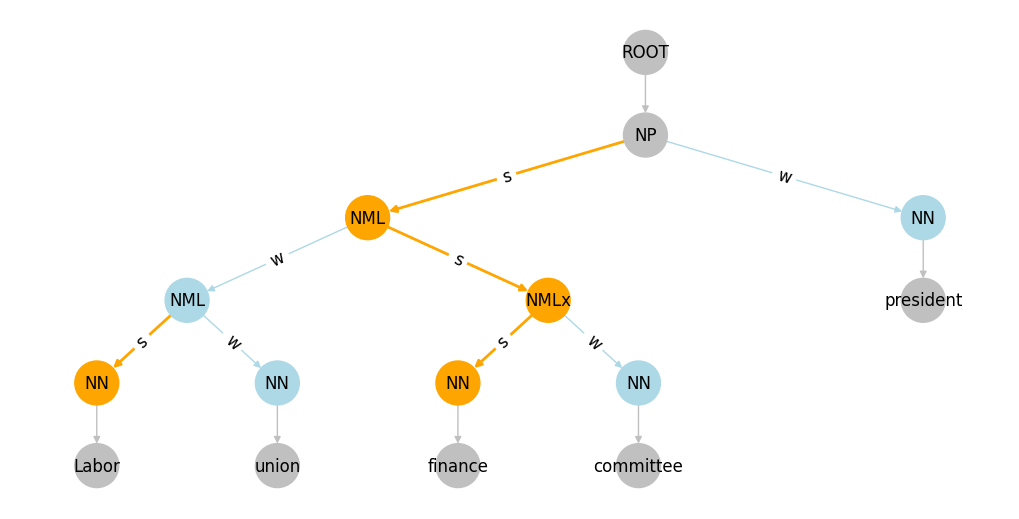

In [4]:
draw_graph(btree.graph())

In [6]:
btree = Text('labor union finance committee').sent(1).btree()
btree.decide_prom()
for word in btree.iter_leaves():
    print(word, word.quantify_stress())

labor -2
union -4
finance 0
committee -2


In [7]:
btree

KeyError: 'weight'

ROOT